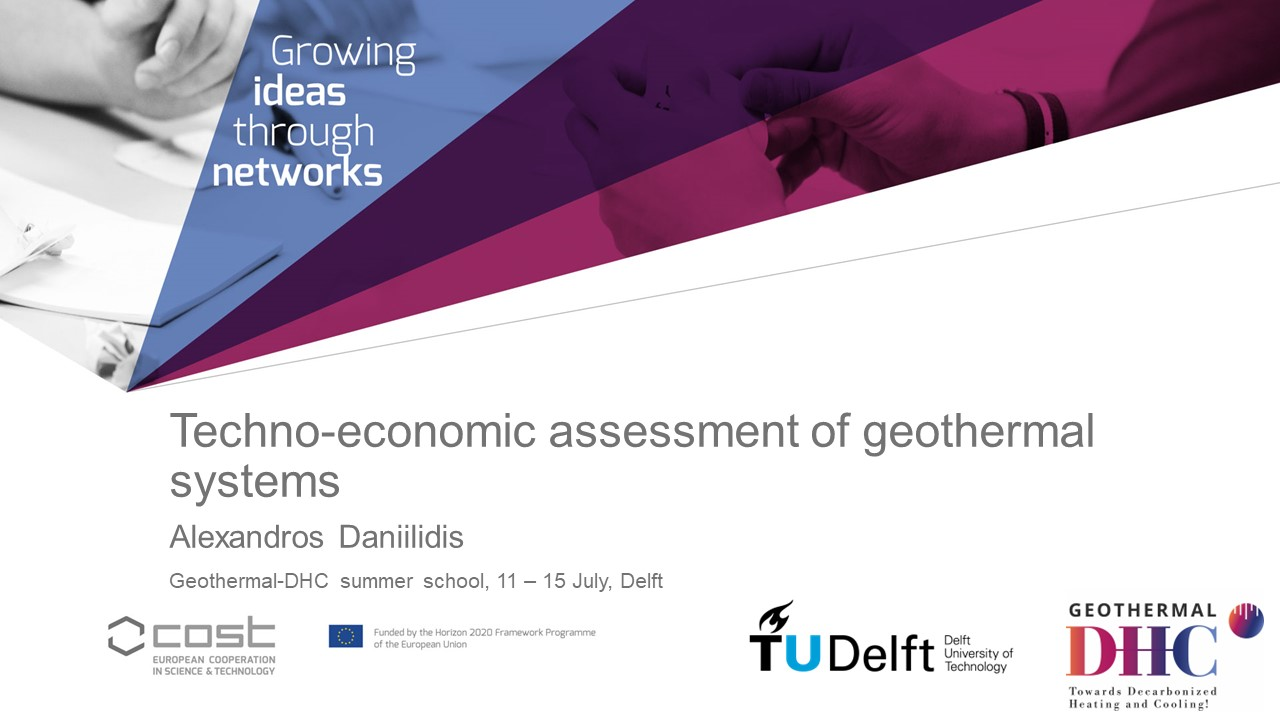

<font size="6"> Economic calculation with a geothermal doublet example </font>

## A simple example of a doublet producing from a homogeneous interval




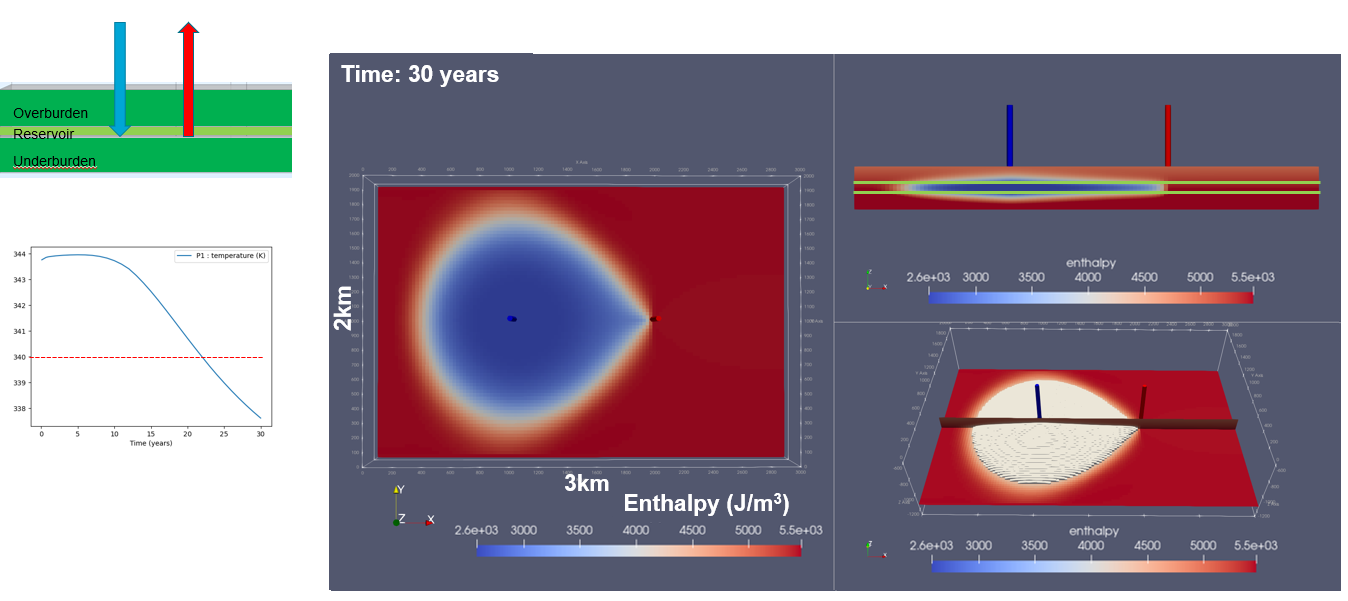

## Example output of lifetime, energy and economic output
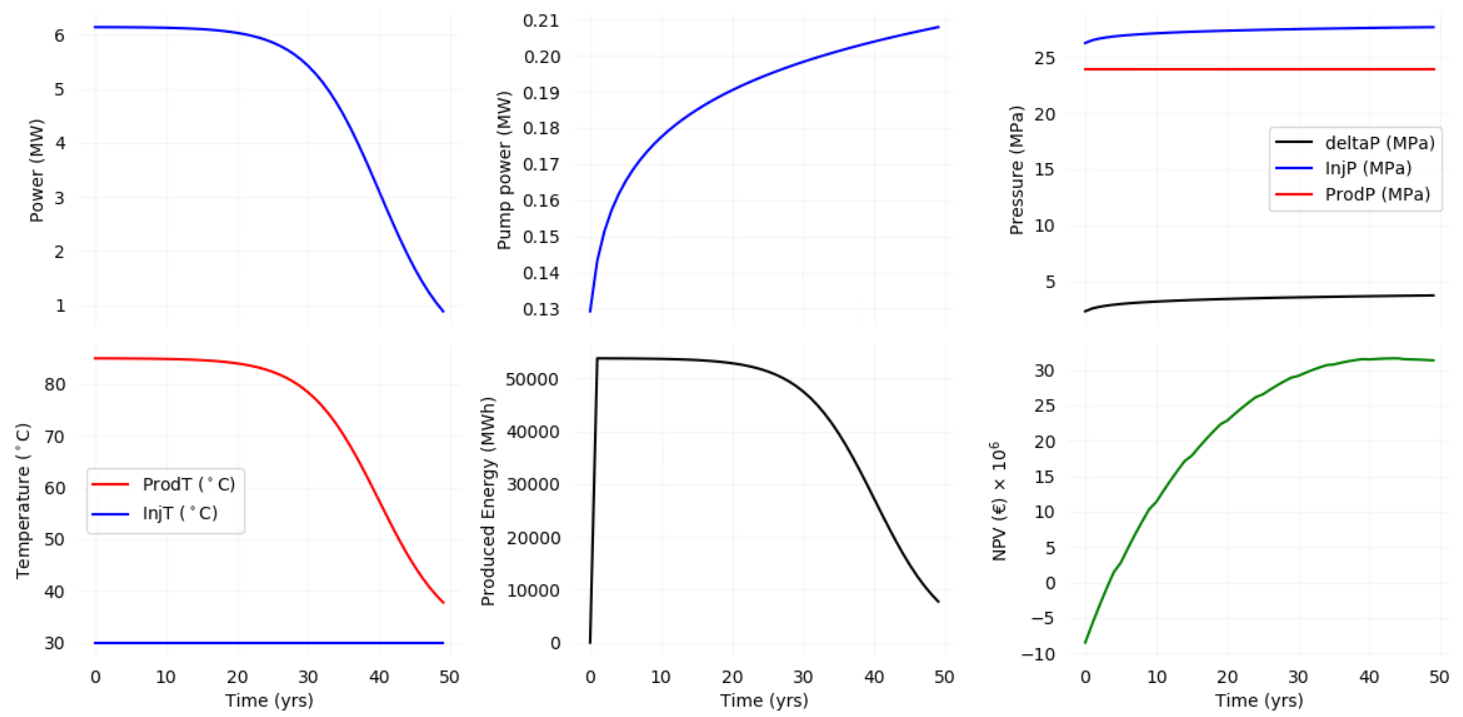

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load example simulation data
# data = pd.read_excel('Doublet_econ_example_time_data.xlsx')
data = pd.read_excel('GTEcon_resthick_150_topres_2000_permres_101_rate_9600.xlsx')

data

,time,resthick,topres,permres,rate,Unnamed: 0,I1 : water rate (m3/day),I1 : temperature (K),I1 : steam rate (m3/day),I1 : energy (KJ/day),P1 : steam rate (m3/day),P1 : energy (KJ/day),I1 : BHP (bar),P1 : water rate (m3/day),P1 : temperature (K),P1 : BHP (bar),FIPS c 0 (kmol),Time (yrs)
0,0.0,150,2000,101,9600,0.000000,9600.000003,303.15,0,1.409341e+09,0,-3.250753e+09,220.708673,-9600.004969,352.144470,183.243251,2.618036e+14,0.000000
1,30.0,150,2000,101,9600,12.113702,9599.999890,303.15,0,1.448243e+09,0,-3.175604e+09,263.964880,-9600.000000,350.561049,163.281153,2.618036e+14,0.082136
2,60.0,150,2000,101,9600,12.560736,9599.999945,303.15,0,1.449758e+09,0,-3.177548e+09,265.682808,-9600.000000,350.613019,163.292572,2.618036e+14,0.164271
3,90.0,150,2000,101,9600,13.001943,9600.000000,303.15,0,1.451253e+09,0,-3.179466e+09,267.377624,-9600.000000,350.664288,163.303806,2.618036e+14,0.246407
4,120.0,150,2000,101,9600,13.113702,9600.000000,303.15,0,1.451595e+09,0,-3.179898e+09,267.766011,-9600.000000,350.675882,163.304659,2.618036e+14,0.328542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,14490.0,150,2000,101,9600,53.698630,9600.000000,303.15,0,1.462576e+09,0,-3.002469e+09,280.306767,-9599.999993,346.022948,159.437048,2.618038e+14,39.671458
484,14520.0,150,2000,101,9600,53.780822,9600.000000,303.15,0,1.462581e+09,0,-3.001622e+09,280.311886,-9599.999994,346.001101,159.422614,2.618038e+14,39.753593
485,14550.0,150,2000,101,9600,53.863014,9600.000000,303.15,0,1.462585e+09,0,-3.000776e+09,280.317006,-9599.999994,345.979253,159.408180,2.618038e+14,39.835729
486,14580.0,150,2000,101,9600,53.945205,9600.000000,303.15,0,1.462590e+09,0,-2.999929e+09,280.322125,-9599.999995,345.957405,159.393746,2.618038e+14,39.917864


In [12]:
# check available collumns in the dataset
data.columns.tolist()

['time',
 'resthick',
 'topres',
 'permres',
 'rate',
 'Unnamed: 0',
 'I1 : water rate (m3/day)',
 'I1 : temperature (K)',
 'I1 : steam rate (m3/day)',
 'I1 : energy (KJ/day)',
 'P1 : steam rate (m3/day)',
 'P1 : energy (KJ/day)',
 'I1 : BHP (bar)',
 'P1 : water rate (m3/day)',
 'P1 : temperature (K)',
 'P1 : BHP (bar)',
 'FIPS c 0 (kmol)',
 'Time (yrs)']

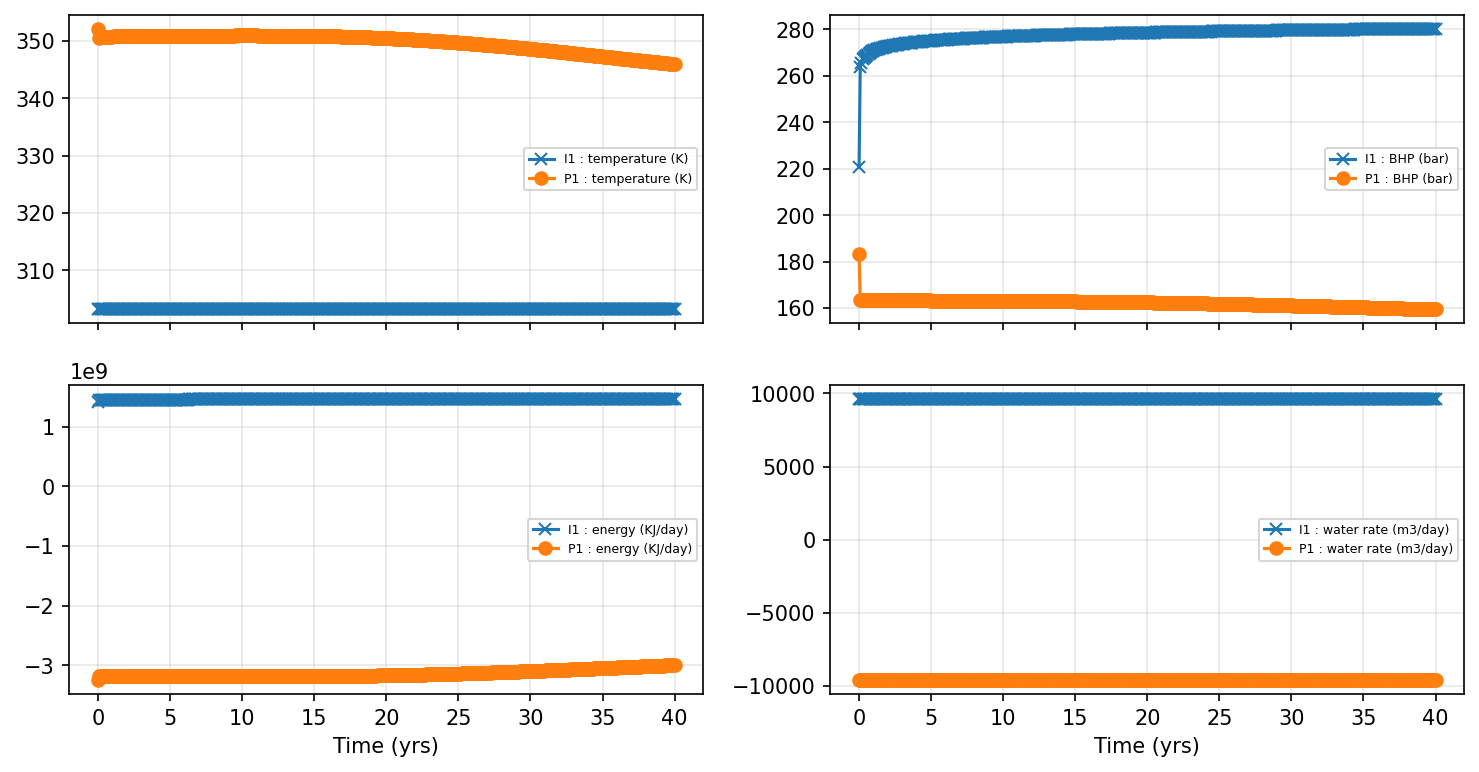

In [14]:
# do a first plot to get an overview of our data
# define a plot
fig, ax = plt.subplots(2,2, figsize=(12,6), dpi=200, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature', 'BHP','energy (KJ/day)','water rate (m3/day)']):
    data.plot(x='Time (yrs)',
              y=data.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'])
    ax_list[i].legend(fontsize=6)
    ax_list[i].grid(alpha=0.3)

plt.show()

In [15]:
# assign datetime as index
data['Datetime'] = pd.to_datetime('1/1/2000') + pd.to_timedelta(
    data['Time (yrs)'] * pd.Timedelta(('365.25 days')), unit='s')
data.set_index('Datetime', inplace=True)


# set the new time interval
set_interval = '365.25D'

# generate the new index on which the data should correspond based on original index range
resample_index = pd.date_range(data.index[0] - pd.Timedelta(set_interval),
                               data.index[-1] + pd.Timedelta(set_interval), freq=set_interval, normalize=True,
                               #inclusive='right')
                               closed='right')



In [16]:
# create a new index as the union of the old and new index and interpolate on the combined index
# then reindex the dataframe to the new index
tdata = data.reindex(data.index.union(resample_index)).interpolate('index').reindex(resample_index)

# # maintain initial values of original dataset in the newly indexed one at the edges
tdata.iloc[0] = data.iloc[1]
tdata.iloc[-1] = data.iloc[-1]

# add the number of periods for further economic assessment
tdata['econ_periods'] = np.arange(len(tdata))

In [17]:
tdata

,time,resthick,topres,permres,rate,Unnamed: 0,I1 : water rate (m3/day),I1 : temperature (K),I1 : steam rate (m3/day),I1 : energy (KJ/day),P1 : steam rate (m3/day),P1 : energy (KJ/day),I1 : BHP (bar),P1 : water rate (m3/day),P1 : temperature (K),P1 : BHP (bar),Time (yrs),econ_periods
1999-12-31 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2000-12-30 12:00:00,364.749658,150.0,2000.0,101.0,9600.0,14.416947,9599.999996,303.15,0.0,1.454356e+09,0.0,-3.183376e+09,270.906130,-9599.999996,350.769448,163.311472,0.998630,1
2001-12-30 18:00:00,730.249829,150.0,2000.0,101.0,9600.0,16.000684,9600.000000,303.15,0.0,1.455930e+09,0.0,-3.185406e+09,272.700193,-9600.000000,350.824631,163.295485,1.999315,2
2002-12-31 00:00:00,1095.750000,150.0,2000.0,101.0,9600.0,17.002055,9599.999993,303.15,0.0,1.456871e+09,0.0,-3.186622e+09,273.773384,-9600.000000,350.858039,163.271958,3.000000,3
2003-12-31 06:00:00,1461.250171,150.0,2000.0,101.0,9600.0,18.003425,9599.999998,303.15,0.0,1.457532e+09,0.0,-3.187475e+09,274.528329,-9600.000000,350.881783,163.244629,4.000685,4
2004-12-30 12:00:00,1826.750342,150.0,2000.0,101.0,9600.0,19.004795,9599.999999,303.15,0.0,1.458037e+09,0.0,-3.188127e+09,275.105951,-9600.000000,350.900123,163.214970,5.001370,5
2005-12-30 18:00:00,2192.250514,150.0,2000.0,101.0,9600.0,20.006166,9600.000000,303.15,0.0,1.458445e+09,0.0,-3.188644e+09,275.572180,-9600.000000,350.914891,163.183521,6.002055,6
2006-12-31 00:00:00,2557.750685,150.0,2000.0,101.0,9600.0,21.007536,9600.000000,303.15,0.0,1.458786e+09,0.0,-3.189057e+09,275.961915,-9600.000000,350.926861,163.150402,7.002740,7
2007-12-31 06:00:00,2923.250856,150.0,2000.0,101.0,9600.0,22.008906,9600.000000,303.15,0.0,1.459079e+09,0.0,-3.189373e+09,276.297864,-9600.000000,350.936274,163.115604,8.003425,8
2008-12-30 12:00:00,3288.751027,150.0,2000.0,101.0,9600.0,23.010277,9600.000000,303.15,0.0,1.459337e+09,0.0,-3.189583e+09,276.593067,-9600.000000,350.942853,163.078940,9.004110,9


In [18]:
# compute the deltahours for economic and energy assessments
tdata['Deltahours'] = tdata.index.to_series().diff(1) / pd.Timedelta('1 hour')

# verify that we only have one delta
tdata['Deltahours'].unique()


array([  nan, 8766.])

In [19]:
# recompute time columns based on index
tdata['Time (yrs)'] = pd.to_timedelta(tdata.index - tdata.index[0]).total_seconds() / (365.25 * 24 * 60 * 60)

# reset index to time delta
tdata.set_index(pd.to_timedelta(tdata['Time (yrs)'] * pd.Timedelta(('365.25 days')), unit='s'), inplace=True)
tdata.drop(columns='time', inplace=True)

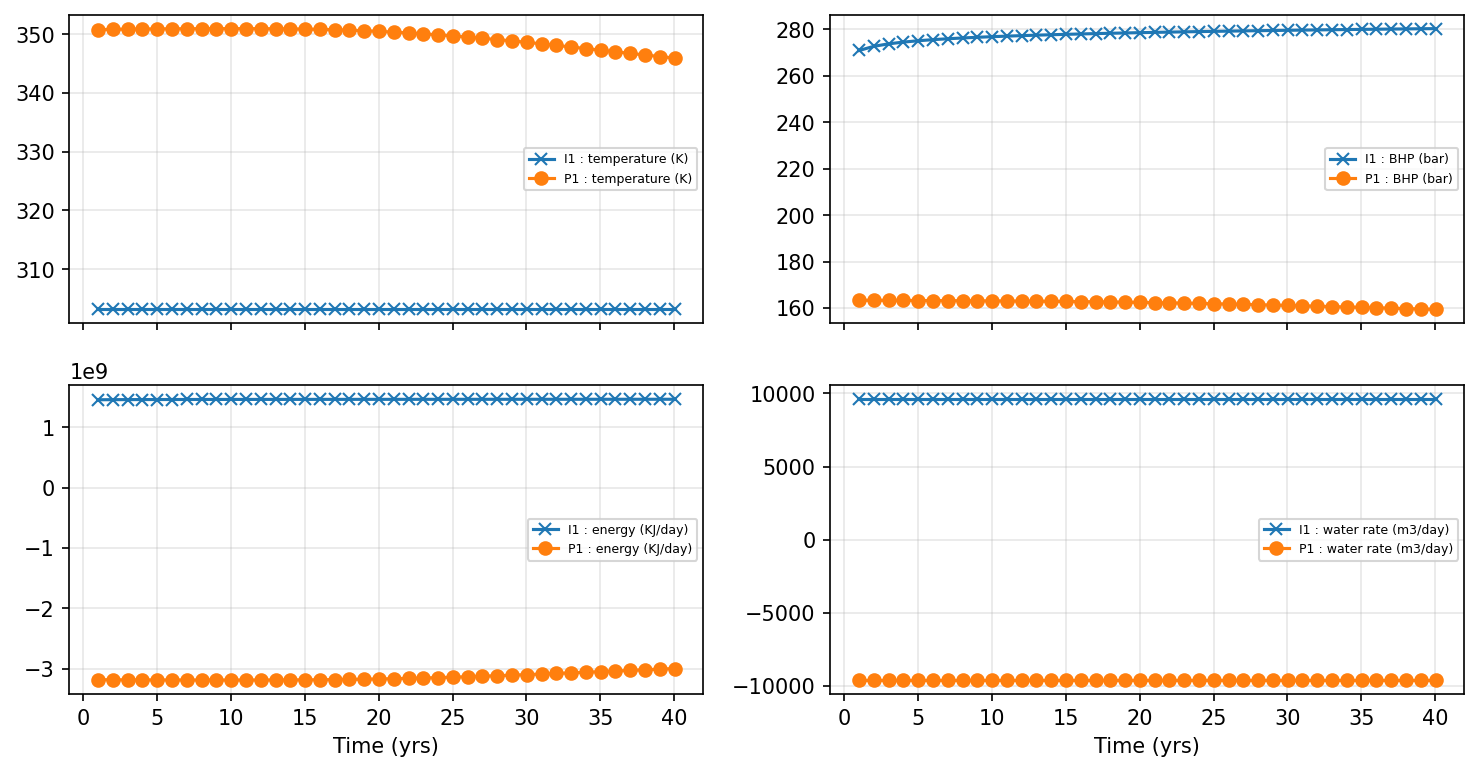

In [20]:
# do a quick plot to get an overview of our treated data
# define a plot
fig, ax = plt.subplots(2,2, figsize=(12,6), dpi=200, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature', 'BHP','energy (KJ/day)','water rate (m3/day)']):
    tdata.plot(x='Time (yrs)',
              y=data.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'])
    ax_list[i].legend(fontsize=6)
    ax_list[i].grid(alpha=0.3)

<AxesSubplot:xlabel='Time (yrs)'>

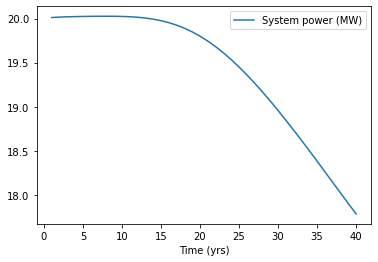

In [21]:
kJ_day_MW = 1/3.6e6/24

# compute system power
tdata['System power (MW)'] = (abs(tdata['P1 : energy (KJ/day)']) - abs(tdata['I1 : energy (KJ/day)']))\
                                       * kJ_day_MW

# compute produced energy
tdata['Produced Energy (MWh)'] = tdata['System power (MW)'] * tdata['Deltahours']

tdata.plot('Time (yrs)', 'System power (MW)')

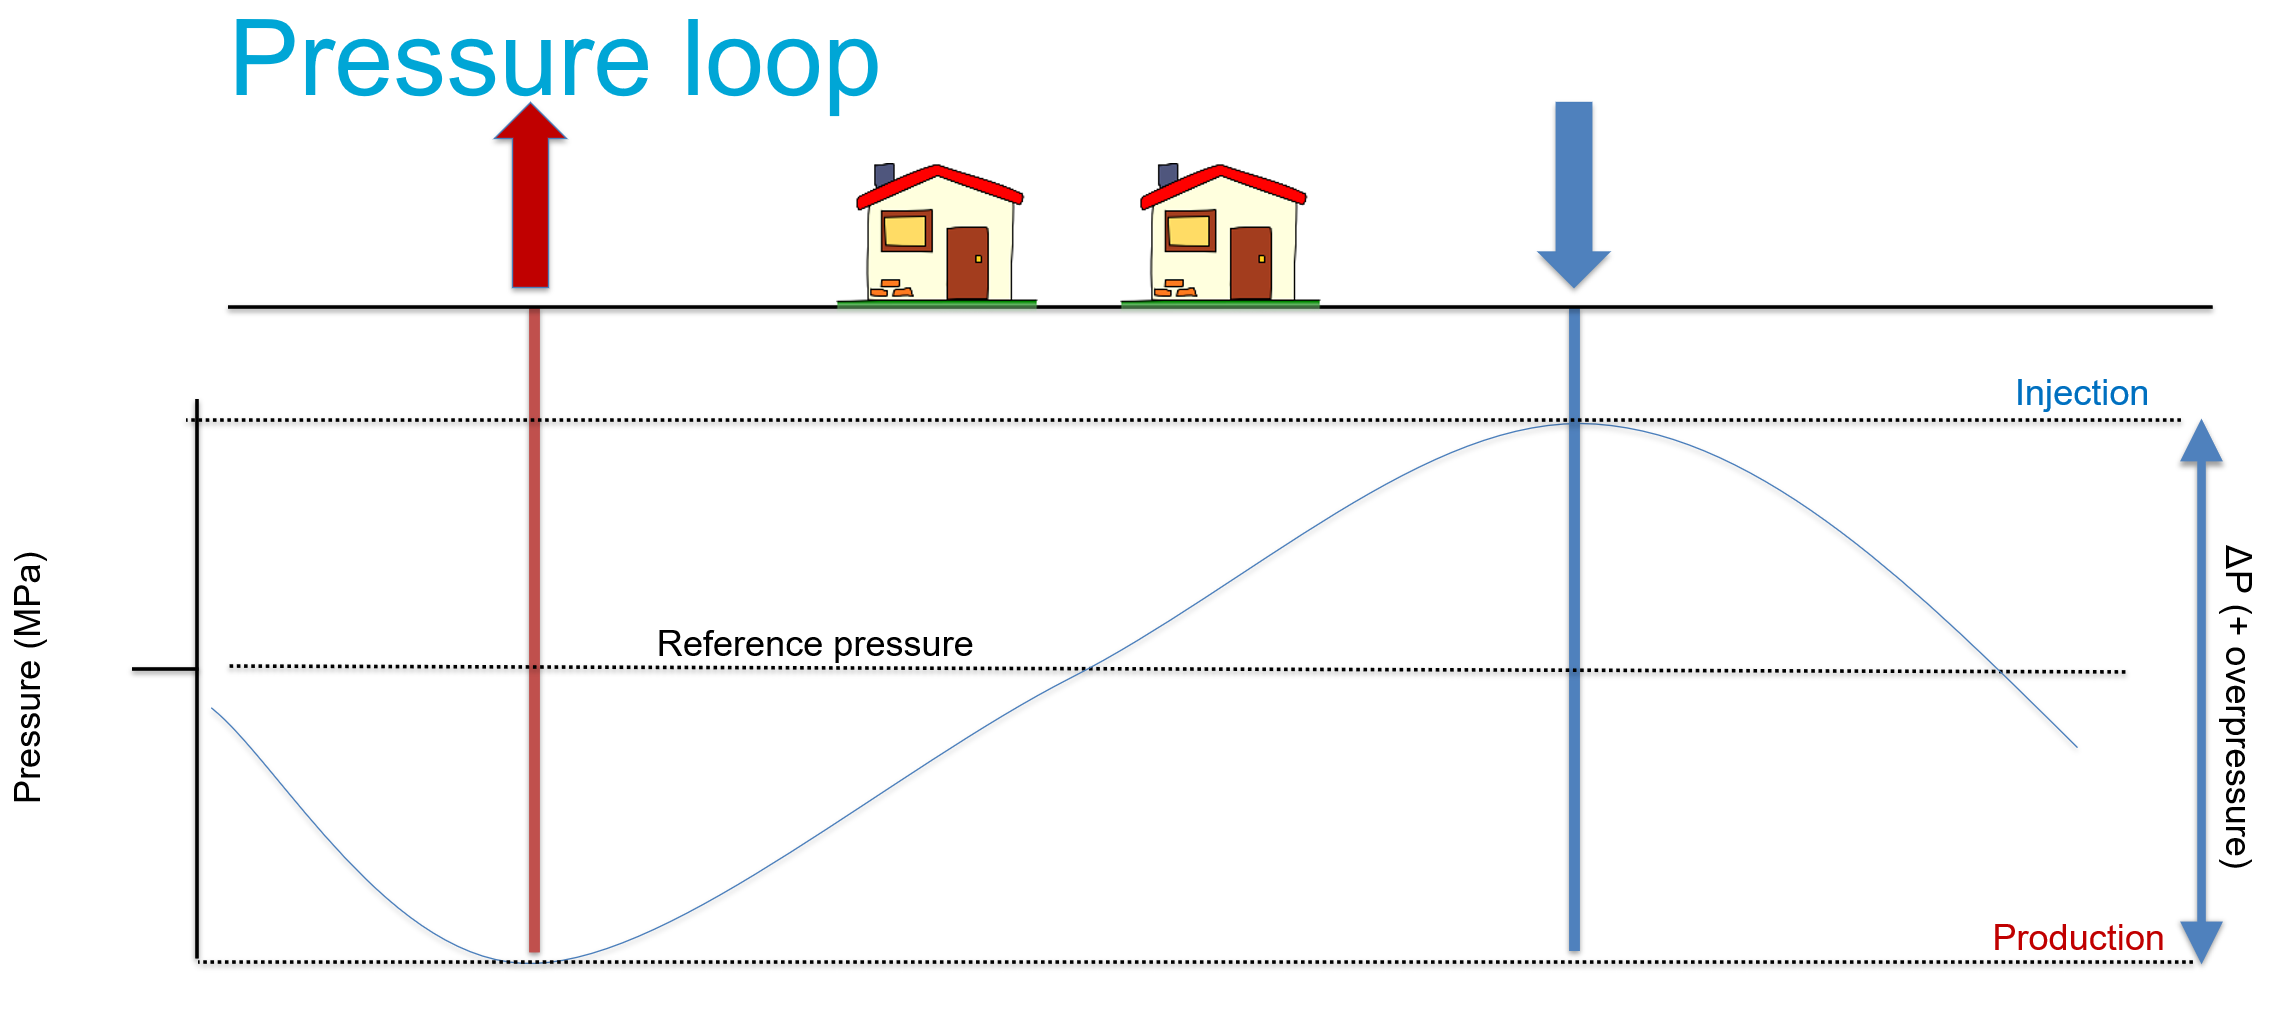


In [22]:
# compute the pressured drop
tdata['Pump dp (MPa)'] = abs(tdata['P1 : BHP (bar)'] * 0.1) - abs(tdata['I1 : BHP (bar)']*0.1)

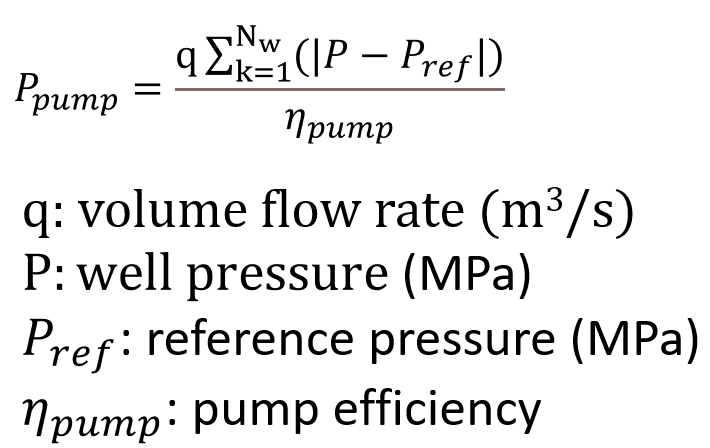

In [23]:
m3_day_m3_sec = 1 / (24 * 60 * 60)
pump_efficiency = 0.5

# compute the pumping power
tdata['Pump power (MW)'] = abs(tdata['Pump dp (MPa)']) * \
                             abs(tdata['I1 : water rate (m3/day)']) * m3_day_m3_sec / pump_efficiency

# compute the pumping costs
electricity_price = ???? # euro/MWh

tdata['OpEx_pump (\u20ac)'] = tdata['Pump power (MW)'] * tdata['Deltahours'] * electricity_price

In [24]:
# assign the CapEx for drilling the wells
tdata['CapEx (€)'] = 0
tdata.loc[tdata.index == tdata.index[0], 'CapEx (€)'] = 2 * 4234250 # drilling costs
tdata.loc[tdata.index == tdata.index[0], 'CapEx (€)'] = 2 * 400000 # pumps

periodic_OpEx_rate = 0.07
# calculate variable OpEx costs
tdata['OpEx (€)'] = tdata['CapEx (€)'].cumsum() * periodic_OpEx_rate




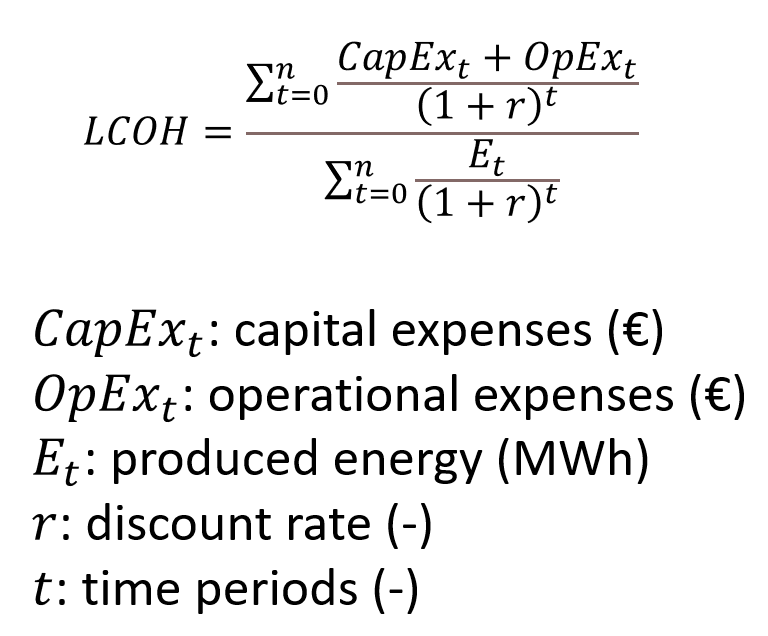

In [25]:
# calculate LCOH
periodic_discount_rate = ???

# compute the LCOH costs
tdata['LCOH costs'] = tdata['CapEx (\u20ac)'].fillna(0) \
                        + tdata['OpEx (\u20ac)'] \
                          + tdata['OpEx_pump (\u20ac)'].fillna(0)

# discount LCOH costs
tdata['discounted LCOH costs'] = (tdata['LCOH costs'] /
                                      (1 + periodic_discount_rate) ** tdata['econ_periods']).cumsum()

tdata['discounted LCOH energy'] = (tdata['Produced Energy (MWh)'] /
                                        (1 + periodic_discount_rate) ** tdata[
                                            'econ_periods']).cumsum()

tdata[r'LCOH (€/MWh)'] = tdata['discounted LCOH costs'] / tdata['discounted LCOH energy']

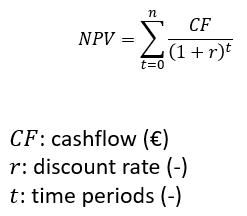

In [26]:
# compute the Net Present Value
heat_price = ??? # euro/MWh

# compute the LCOH costs
tdata['CashFlow (€)'] =   (tdata['Produced Energy (MWh)'].fillna(0) * heat_price) - tdata['CapEx (€)'].fillna(0) \
                       - tdata['OpEx (€)'] \
                       - tdata['OpEx_pump (€)'].fillna(0) \
                        

# discount LCOH costs
tdata['NPV (€) x $10^6$'] = (tdata['CashFlow (€)']*1e-6 /
                                      (1 + periodic_discount_rate) ** tdata['econ_periods']).cumsum()



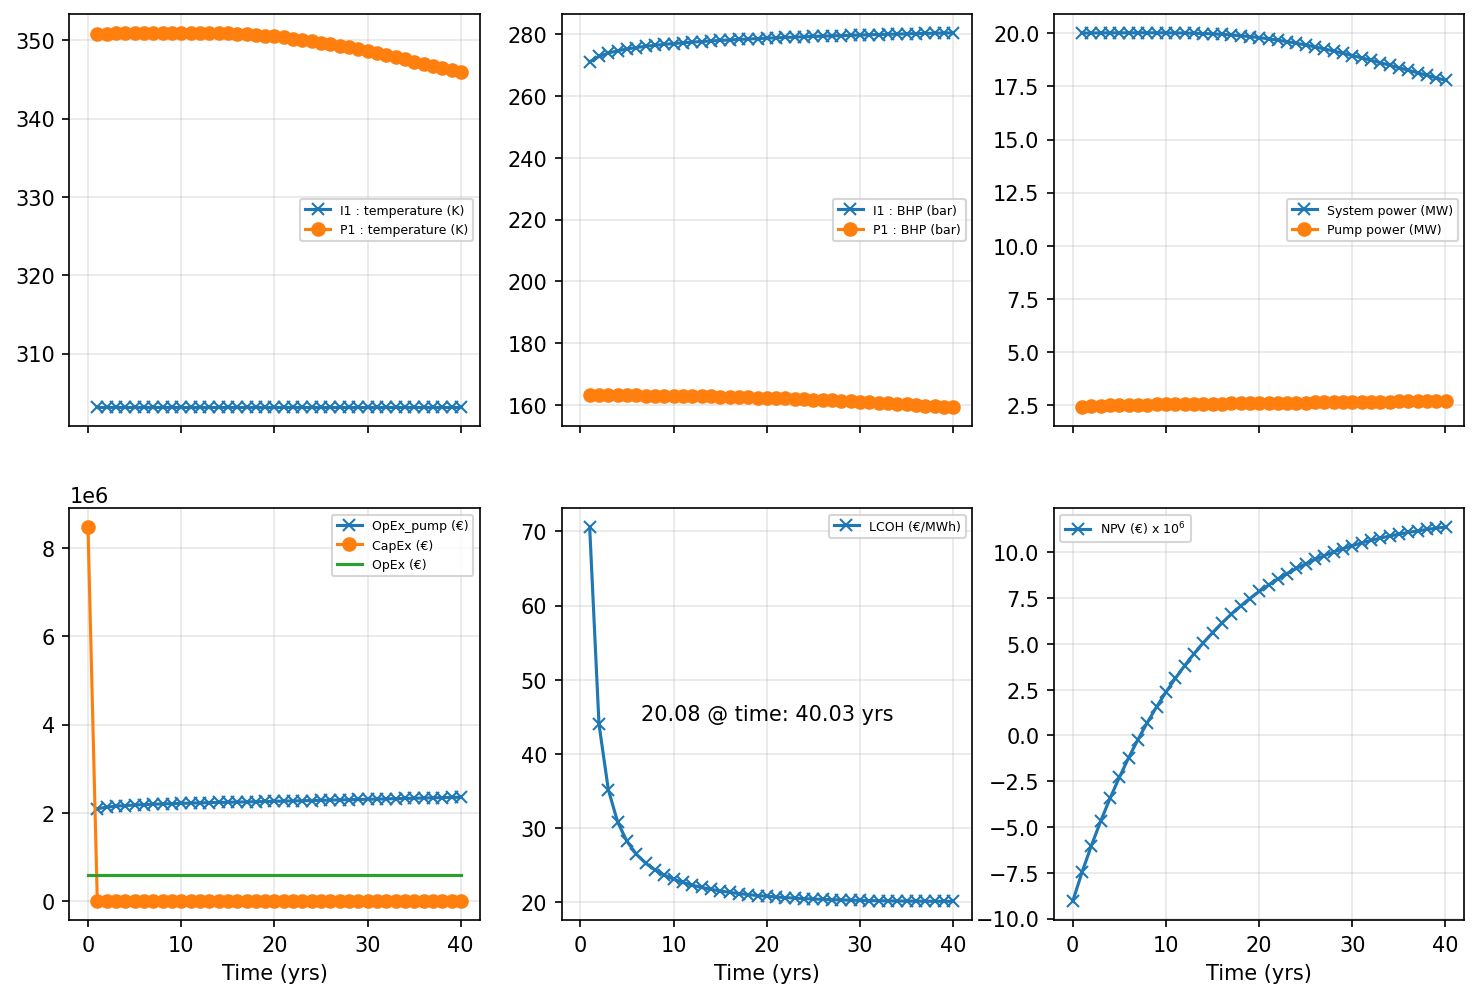

In [27]:
# do our final plot with the overview
# define a plot
fig, ax = plt.subplots(2,3, figsize=(12,8), dpi=150, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature', 'BHP',
                         'power', 'Ex','LCOH (€/MWh)', 'NPV (€) x $10^6$']):
    tdata.plot(x='Time (yrs)',
              y=tdata.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'])
    ax_list[i].legend(fontsize=6)
    ax_list[i].grid(alpha=0.3)
    if key == 'LCOH (€/MWh)':
        ax_list[i].annotate('%0.2f @ time: %.2f yrs' % (tdata[key].iloc[-1], tdata['Time (yrs)'].iloc[-1]),
                            xy=(0.5, 0.5), va='center', ha='center',
                            xycoords=('axes fraction'))


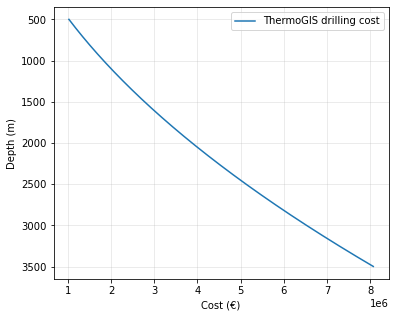

In [28]:
def drillingcostnl(depth):
    """
    Calculate the cost of drilling as a function of depth
    Reference source:
        https://www.thermogis.nl/en/economic-model

    :param depth: float
        measured depth along hole in meters

    :return: float
        costs in euros
    """
    drilling_cost_nl = 375000 + 1150 * depth + 0.3 * depth ** 2
    return(drilling_cost_nl)

depth = np.arange(500, 3500, 1)
costs = drillingcostnl(depth)

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(costs, depth, label='ThermoGIS drilling cost')
ax.set_xlabel('Cost (€)')
ax.set_ylabel('Depth (m)')
ax.grid(alpha=0.3)
ax.legend()
ax.invert_yaxis()


In [29]:
drillingcostnl(2150)


4234250.0

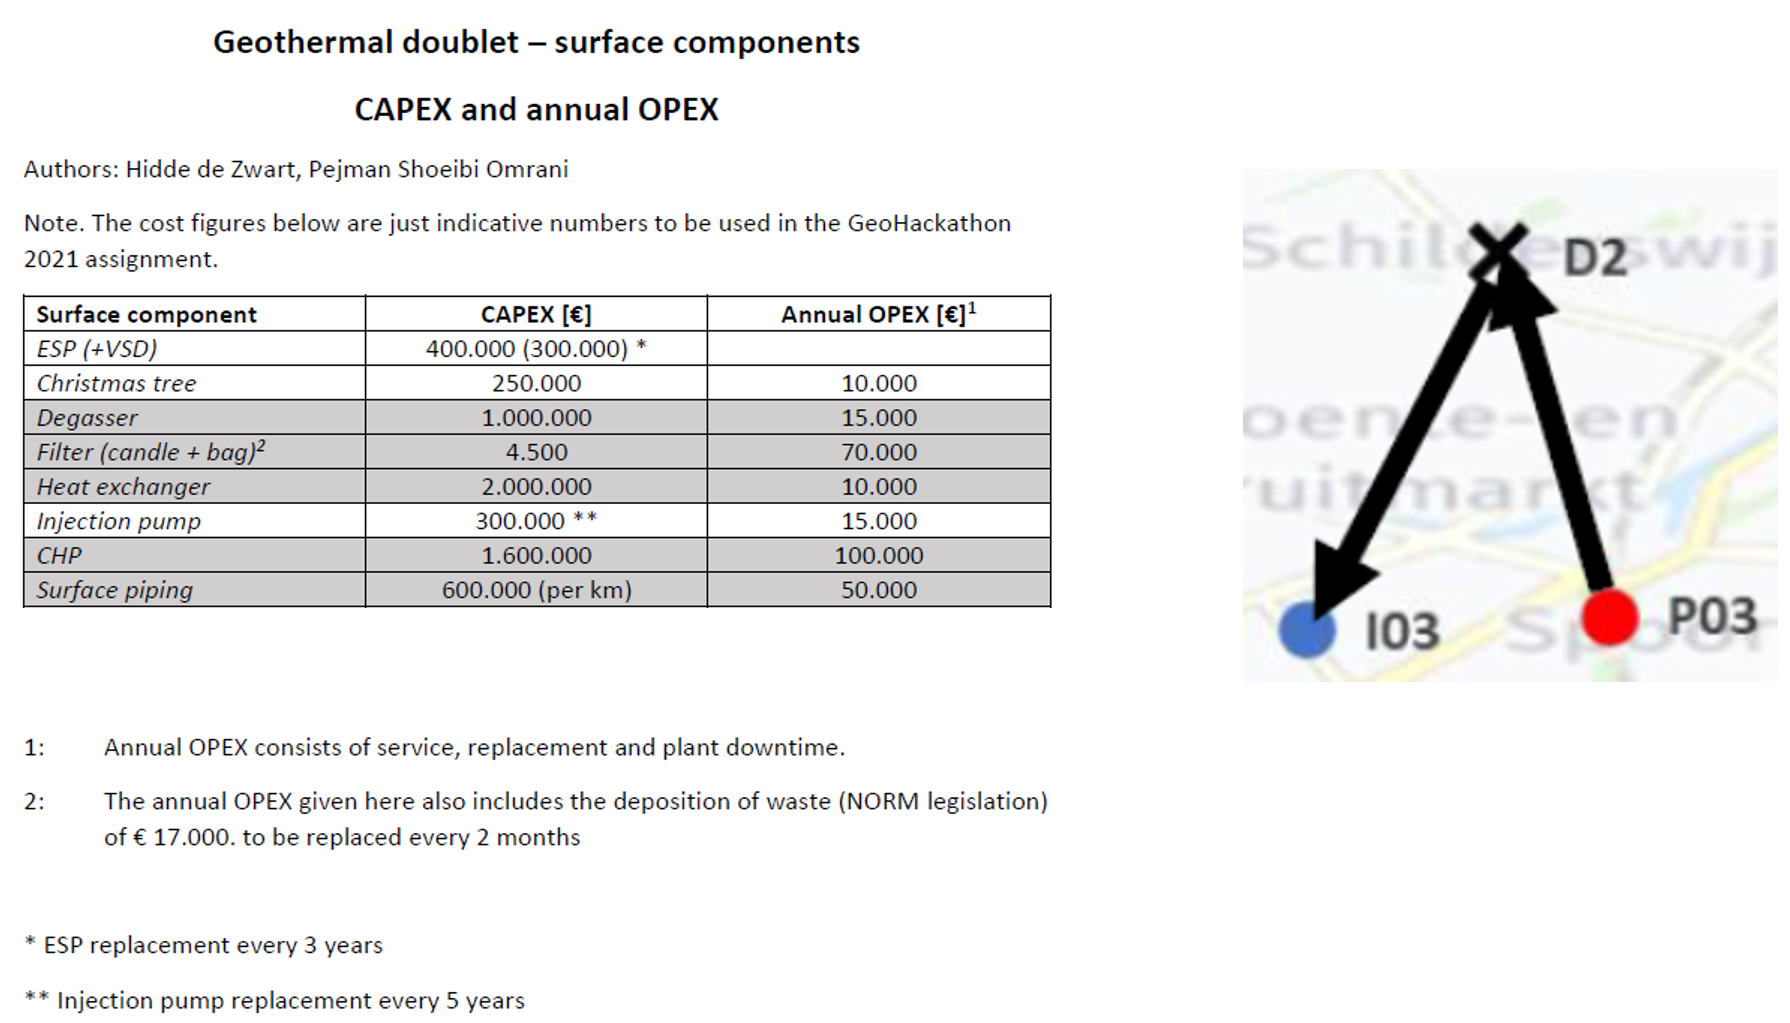